In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# On fixe la graine
random.seed(42)

In [186]:
data=pd.read_csv("data_seed2.txt", sep="\t", decimal=",", dtype="object")
data.columns = data.columns.str.lower()
data.head()

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20
0,202 410,9 201 003 869,"0,00","800,00","0,00","0,00","0,00","800,00","0,00","0,00",...,"-47 333,00","-13 333,00","0,00","92,00","262,00","5,00",0,"0,00",0,2
1,202 410,9 599 624 616,"1 152,00","200,00","0,00","0,00","1 755,00","200,00","0,00","0,00",...,"-3 333,00","-3 000,00","1 000,00","71,00","321,00","54,00",0,"1 000,00",0,2
2,202 412,1 413 515 491,"87 805,00","6 680,61","1,00","1,00","76 354,00","6 738,46","1,00","1,00",...,"220 333,00","146 666,00","157 084,00","0,00","13,00","0,00",0,"157 084,00",0,2
3,202 404,1 600 773 833,"2 468,00","200,00","0,00","0,00","2 534,00","200,00","0,00","0,00",...,"3 666,00","8 333,00","57 333,00","12,00","17,00","0,00",0,"57 333,00",0,2
4,202 409,2 661 466 041,"513 708,00","1 000,00","0,00","0,00","257 317,00","1 000,00","0,00","0,00",...,"370 333,00","210 666,00","0,00","9,00","247,00","60,00",0,"0,00",0,2


In [187]:
def ajouter_mois_depuis_colonne(df, colonne):
    # Dictionnaire de correspondance chiffre → mois
    mois_map = {
        '01': 'Jan', '02': 'Fev', '03': 'Mars', '04': 'Avril',
        '05': 'Mai', '06': 'Juin', '07': 'Juil', '08': 'Août',
        '09': 'Sept', '10': 'Oct', '11': 'Nov', '12': 'Dec'
    }

    def extraire_mois(val):
        # Convertir en string et extraire les deux derniers chiffres
        deux_derniers = str(val)[-2:]
        # Retourner le mois si possible
        return mois_map.get(deux_derniers, None)
    months= df[colonne].apply(extraire_mois)
    return months

In [188]:
data["month"]=ajouter_mois_depuis_colonne(data, "datdelhis_mm0")
data.head()

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20,month
0,202 410,9 201 003 869,"0,00","800,00","0,00","0,00","0,00","800,00","0,00","0,00",...,"-13 333,00","0,00","92,00","262,00","5,00",0,"0,00",0,2,Oct
1,202 410,9 599 624 616,"1 152,00","200,00","0,00","0,00","1 755,00","200,00","0,00","0,00",...,"-3 000,00","1 000,00","71,00","321,00","54,00",0,"1 000,00",0,2,Oct
2,202 412,1 413 515 491,"87 805,00","6 680,61","1,00","1,00","76 354,00","6 738,46","1,00","1,00",...,"146 666,00","157 084,00","0,00","13,00","0,00",0,"157 084,00",0,2,Dec
3,202 404,1 600 773 833,"2 468,00","200,00","0,00","0,00","2 534,00","200,00","0,00","0,00",...,"8 333,00","57 333,00","12,00","17,00","0,00",0,"57 333,00",0,2,Avril
4,202 409,2 661 466 041,"513 708,00","1 000,00","0,00","0,00","257 317,00","1 000,00","0,00","0,00",...,"210 666,00","0,00","9,00","247,00","60,00",0,"0,00",0,2,Sept


In [189]:
##présence de données manquantes
data.loc[[345,]]

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20,month
345,202 410,5 510 074 447,"14 473,00","117 279,66","0,00","0,00","19 523,00","117 912,64","0,00","0,00",...,?,?,?,?,?,?,?,0,2,Oct


In [190]:
any(data.isna().sum())

False

In [191]:
data.dtypes

datdelhis_mm0         object
numtecprs             object
sldcrdmms_sum_mm1     object
engagement_sum_mm1    object
top_pret_conso_mm1    object
                       ...  
topcptlitig           object
somme_encours         object
cible                 object
rnd_1_20              object
month                 object
Length: 131, dtype: object

In [192]:
def convert_if_numeric(col):
    if col.dtype == "object":
        # Supprimer tous les espaces, y compris espace insécable
        cleaned = col.str.replace("\u202f", "")
        # Remplacer la virgule décimale par un point
        cleaned = cleaned.str.replace(",", ".")
        # Essayer de convertir en numérique
        numeric_col = pd.to_numeric(cleaned, errors="coerce")
        # Si au moins une valeur numérique existe, on remplace la colonne
        if numeric_col.notna().any():
            return numeric_col
    return col

# Appliquer la fonction à toutes les colonnes
data = data.apply(convert_if_numeric)
data.head()

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20,month
0,202410,9201003869,0.0,800.00,0.0,0.0,0.0,800.00,0.0,0.0,...,-13333.0,0.0,92.0,262.0,5.0,0.0,0.0,0,2,Oct
1,202410,9599624616,1152.0,200.00,0.0,0.0,1755.0,200.00,0.0,0.0,...,-3000.0,1000.0,71.0,321.0,54.0,0.0,1000.0,0,2,Oct
2,202412,1413515491,87805.0,6680.61,1.0,1.0,76354.0,6738.46,1.0,1.0,...,146666.0,157084.0,0.0,13.0,0.0,0.0,157084.0,0,2,Dec
3,202404,1600773833,2468.0,200.00,0.0,0.0,2534.0,200.00,0.0,0.0,...,8333.0,57333.0,12.0,17.0,0.0,0.0,57333.0,0,2,Avril
4,202409,2661466041,513708.0,1000.00,0.0,0.0,257317.0,1000.00,0.0,0.0,...,210666.0,0.0,9.0,247.0,60.0,0.0,0.0,0,2,Sept


In [193]:
data.somme_encours[data.somme_encours.isna()]

345     NaN
1278    NaN
3906    NaN
6304    NaN
7128    NaN
7855    NaN
8607    NaN
9092    NaN
9136    NaN
10510   NaN
10568   NaN
11831   NaN
12762   NaN
13432   NaN
16825   NaN
17771   NaN
18790   NaN
19397   NaN
20057   NaN
20195   NaN
23267   NaN
24788   NaN
25569   NaN
26716   NaN
28265   NaN
29025   NaN
30900   NaN
34166   NaN
36875   NaN
37959   NaN
38729   NaN
41665   NaN
42383   NaN
44016   NaN
44900   NaN
45571   NaN
45623   NaN
46557   NaN
47199   NaN
48298   NaN
Name: somme_encours, dtype: float64

In [194]:
data.loc[[345,]]

,datdelhis_mm0,numtecprs,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,...,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours,cible,rnd_1_20,month
345,202410,5510074447,14473.0,117279.66,0.0,0.0,19523.0,117912.64,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,Oct


In [196]:
##variables ont des NA
var_with_na=data.isna().sum()
var_with_na[var_with_na>0]

sldcrdmms_sum_mm1     110
engagement_sum_mm1    110
top_pret_conso_mm1    110
nbr_pret_conso_mm1    110
sldcrdmms_sum_mm2     194
                     ... 
crtad_ag_nbjde_bb      40
crtad_ag_nbjde_ba      40
crtad_ag_nbjde_bc      40
topcptlitig            40
somme_encours          40
Length: 92, dtype: int64

In [197]:
data.dtypes

datdelhis_mm0           int64
numtecprs               int64
sldcrdmms_sum_mm1     float64
engagement_sum_mm1    float64
top_pret_conso_mm1    float64
                       ...   
topcptlitig           float64
somme_encours         float64
cible                   int64
rnd_1_20                int64
month                  object
Length: 131, dtype: object

In [198]:
data.dtypes.value_counts()

float64    118
int64       11
object       2
Name: count, dtype: int64

In [199]:
##reperer les colonnes constantes
def all_constant_columns(df):
    result=[]
    for col in df.columns:
        if df[col].nunique() == 1:
            result.append(col)
    return result
all_constant_columns(data)

['indrskdtx', 'ratio_mensu_imo_solde_dbtsum', 'rnd_1_20']

In [200]:
y=data.cible
X=data.drop(all_constant_columns(data)+["cible","datdelhis_mm0", "numtecprs"], axis=1) ##on supprime les variables d'identification

In [202]:

data.to_csv("data_with_na_explicited.csv", sep=";", header=True)

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20 % des données pour le test
    random_state=42,     # pour reproductibilité (comme set.seed en R)
    stratify=y
)

In [206]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
##Création des transformations de variables

In [205]:
X_train.describe()

,sldcrdmms_sum_mm1,engagement_sum_mm1,top_pret_conso_mm1,nbr_pret_conso_mm1,sldcrdmms_sum_mm2,engagement_sum_mm2,top_pret_conso_mm2,nbr_pret_conso_mm2,sldcrdmms_sum_mm3,top_pret_conso_mm3,...,ndb_modele_mm3_mm1_sum,crtad_ag_solde_t,crtad_ag_solde_t1,crtad_ag_solde_t2,encours_par,crtad_ag_nbjde_bb,crtad_ag_nbjde_ba,crtad_ag_nbjde_bc,topcptlitig,somme_encours
count,4.315600e+04,4.315600e+04,43156.000000,43156.000000,4.309300e+04,4.309300e+04,43093.000000,43093.000000,4.301800e+04,43018.000000,...,42980.000000,4.320900e+04,4.320900e+04,4.320900e+04,4.320800e+04,43209.000000,43209.000000,43209.000000,43209.000000,4.320900e+04
mean,2.888081e+05,5.587023e+04,0.201015,0.250046,2.907512e+05,5.593082e+04,0.201170,0.249623,2.903638e+05,0.200474,...,0.001024,6.531809e+05,6.583670e+05,6.652917e+05,3.341192e+06,16.850101,80.454095,15.369067,0.000139,3.341115e+06
std,1.977430e+06,1.600712e+05,0.400764,0.556333,1.911278e+06,1.602908e+05,0.400879,0.554590,1.893145e+06,0.400360,...,0.050118,3.075167e+06,2.987290e+06,2.992257e+06,3.112401e+07,28.744881,130.779969,27.772614,0.011783,3.112365e+07
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,-3.357450e+08,-3.214533e+08,-3.243515e+08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.239100e+04,5.000000e+02,0.000000,0.000000,1.245600e+04,5.000000e+02,0.000000,0.000000,1.256625e+04,0.000000,...,0.000000,2.916600e+04,2.850000e+04,2.883300e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,4.665000e+04,1.602970e+03,0.000000,0.000000,4.676800e+04,1.600000e+03,0.000000,0.000000,4.652950e+04,0.000000,...,0.000000,1.116660e+05,1.113330e+05,1.118330e+05,2.220000e+05,0.000000,9.000000,0.000000,0.000000,2.220000e+05
75%,1.693988e+05,3.565920e+04,0.000000,0.000000,1.697740e+05,3.520686e+04,0.000000,0.000000,1.697215e+05,0.000000,...,0.000000,3.940000e+05,3.980000e+05,3.981660e+05,2.140122e+06,23.000000,111.000000,18.000000,0.000000,2.139749e+06
max,3.140236e+08,1.200133e+07,1.000000,7.000000,3.039003e+08,1.200018e+07,1.000000,7.000000,3.140389e+08,1.000000,...,3.000000,1.976322e+08,1.496978e+08,1.536060e+08,5.581015e+09,266.000000,1321.000000,313.000000,1.000000,5.581015e+09


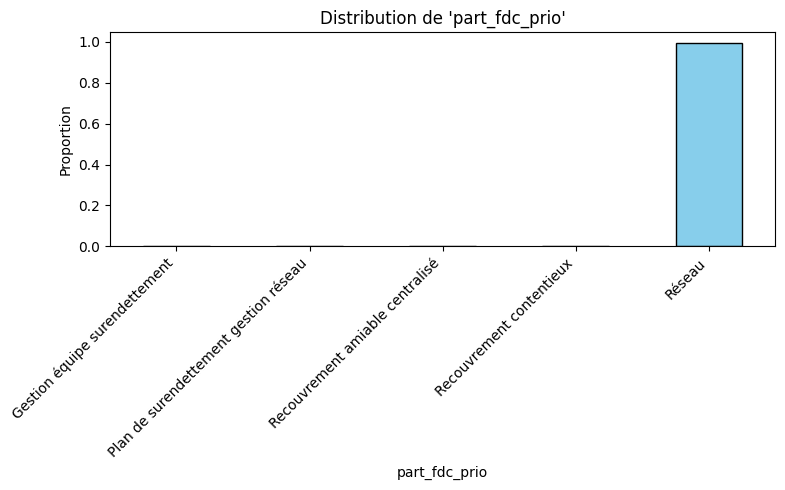

In [47]:
def plot_categorical_distribution(df, var, target=None):
    plt.figure(figsize=(8, 5))

    if target is None:
        # Distribution simple
        df[var].value_counts(normalize=True).sort_index().plot(
            kind='bar', color='skyblue', edgecolor='black'
        )
        plt.title(f"Distribution de '{var}'")
        plt.ylabel("Proportion")
        plt.xlabel(var)
    else:
        # Distribution par classe cible
        prop_df = (
            df.groupby([var, target])
              .size()
              .groupby(level=0)
              .apply(lambda x: x / x.sum())
              .unstack()
        )

        prop_df.plot(kind='bar', stacked=False, color=['lightcoral', 'skyblue'], edgecolor='black')
        plt.title(f"Distribution de '{var}' selon '{target}'")
        plt.ylabel("Proportion")
        plt.xlabel(var)
        plt.legend(title=target)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(data,'part_fdc_prio')

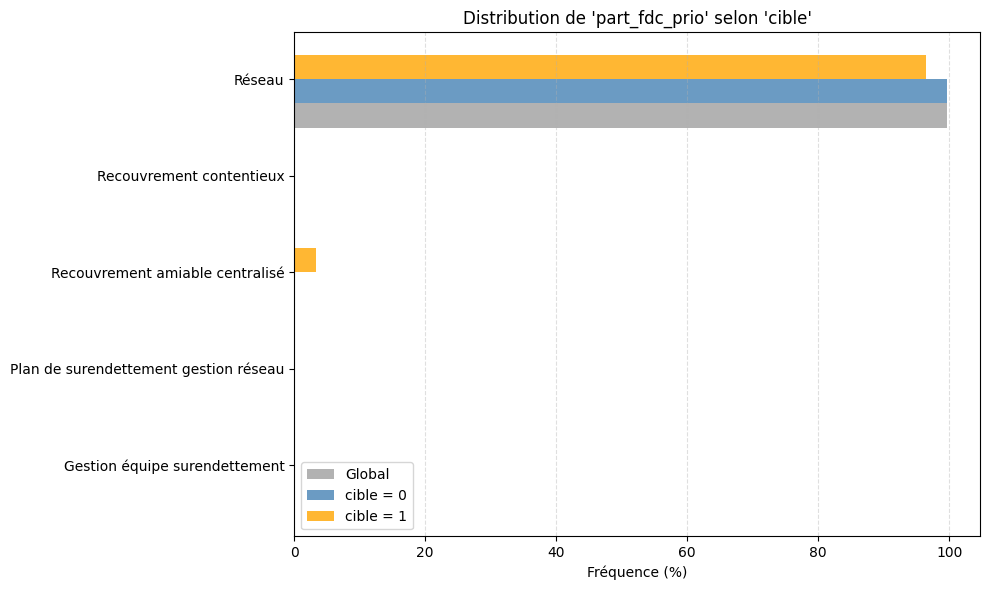

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_grouped_horizontal_bars(data, col, target, title=None, colors=None):
    """
    Trace un barplot horizontal groupé :
    - une barre pour la distribution globale
    - une pour chaque modalité de la variable cible (max 2)
    """
    # Copie et remplacement des NaN
    df = data[[col, target]].copy()
    df[col] = df[col].fillna("Manquant")
    df[target] = df[target].fillna("Manquant")

    # Comptage global (%)
    global_counts = df[col].value_counts(normalize=True).sort_index() * 100
    categories = global_counts.index

    # Comptage par modalité du target (on limite à 2 modalités)
    target_modalities = df[target].unique()
    if len(target_modalities) > 2:
        print(f"⚠️ Attention : {target} a {len(target_modalities)} modalités. Seules les deux premières seront tracées.")
        target_modalities = target_modalities[:2]

    counts_by_target = {
        t: df[df[target] == t][col].value_counts(normalize=True).reindex(global_counts.index, fill_value=0) * 100
        for t in target_modalities
    }

    # Couleurs
    if colors is None:
        colors = ["gray", "steelblue", "orange"]

    # Positionnement des barres côte à côte
    y = np.arange(len(categories))
    bar_height = 0.25

    plt.figure(figsize=(10, 6))

    # Barre globale
    plt.barh(y - bar_height, global_counts, height=bar_height, color=colors[0], label="Global", alpha=0.6)

    # Barres par modalité du target
    for i, t in enumerate(target_modalities):
        plt.barh(y + i * bar_height, counts_by_target[t], height=bar_height, 
                 color=colors[i + 1], label=f"{target} = {t}", alpha=0.8)

    # Mise en forme
    plt.yticks(y + bar_height / 2, categories)
    plt.xlabel("Fréquence (%)")
    plt.title(title if title else f"Distribution de '{col}' selon '{target}'")
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

plot_grouped_horizontal_bars(data, "part_fdc_prio", "cible")

In [208]:
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

def cramers_v(data, x, y, seuil=5):
    # Table de contingence
    data2=data.copy()
    data2= data[[x, y]].dropna()
    table = pd.crosstab(data2[x], data2[y])
    # Test du chi-deux
    chi2, _, _, expected = chi2_contingency(table)
    # Calcul du V de Cramer
    n = table.sum().sum()
    k = min(table.shape) - 1
    v = np.sqrt(chi2 / (n * k))
    validite=False
    if (expected >= seuil).all():
        validite=True
    return v, validite

def kruskal_by_target(df, col_quanti, col_cible):
    # Séparer les groupes selon la cible
    data=df.copy()
    data = data[[col_quanti, col_cible]].dropna()
    group0 = data[data[col_cible] == 0][col_quanti]
    group1 = data[data[col_cible] == 1][col_quanti]

    # Effectuer le test de Kruskal-Wallis
    stat, p_value = kruskal(group0, group1)
    return stat, p_value

def analyze_features(df, col_cible):
    results = []

    for col in df.columns:
        if col == col_cible:
            continue

        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Variable catégorielle → V de Cramer
            v, validite = cramers_v(df, col, col_cible)
            if validite:
                results.append({'var': col, 'type': 'v_cramer', 'value': v})
            else: 
                results.append({'var': col, 'type': 'v_cramer_non_valide', 'value': v})
        else:
            # Variable numérique → p-value Kruskal-Wallis
            try:
                stat, _ = kruskal_by_target(df, col, col_cible)
                results.append({'var': col, 'type': 'stat_kruskal_wallis', 'value': stat})
            except Exception:
                print(f"Colonne à problème {col}")
    return pd.DataFrame(results)

In [209]:
first_var_selection=analyze_features(df_train.drop("month", axis=1), "cible")
first_var_selection

,var,type,value
0,sldcrdmms_sum_mm1,stat_kruskal_wallis,921.319957
1,engagement_sum_mm1,stat_kruskal_wallis,129.097206
2,top_pret_conso_mm1,stat_kruskal_wallis,24.001788
3,nbr_pret_conso_mm1,stat_kruskal_wallis,23.972213
4,sldcrdmms_sum_mm2,stat_kruskal_wallis,873.135630
...,...,...,...
119,crtad_ag_nbjde_bb,stat_kruskal_wallis,832.577788
120,crtad_ag_nbjde_ba,stat_kruskal_wallis,720.204608
121,crtad_ag_nbjde_bc,stat_kruskal_wallis,368.642585
122,topcptlitig,stat_kruskal_wallis,45.285742


In [210]:
## les variabes qualitatives
first_var_selection[first_var_selection["type"]!="stat_kruskal_wallis"]

,var,type,value
107,part_fdc_prio,v_cramer_non_valide,0.10927


In [211]:
#Il y a un probleme avec la variable qualitative, car le test est non vérifié
table = pd.crosstab(df_train["part_fdc_prio"], df_train["cible"])
table

cible,0,1
part_fdc_prio,,
Gestion équipe surendettement,9,0
Plan de surendettement gestion réseau,73,1
Recouvrement amiable centralisé,42,22
Recouvrement contentieux,1,0
Réseau,42524,570


In [212]:
##La modalité Reseau semble prépondérante, on va regrouper les autres modalités
def regrouper_modalites(df, colonne, modalite_a_garder, nouvelle_modalite="Autres"):
    df = df.copy()
    df[colonne] = df[colonne].apply(lambda x: x if x == modalite_a_garder else nouvelle_modalite)
    return df

In [213]:
##Je retiens Reseau comme modalité fixe et les autres je les mets en Autres
df_train=regrouper_modalites(df_train, "part_fdc_prio", "Réseau")

In [214]:
table2 = pd.crosstab(df_train["part_fdc_prio"], df_train["cible"])
table2

cible,0,1
part_fdc_prio,,
Autres,125,23
Réseau,42524,570


In [216]:
first_var_selection2=analyze_features(df_train.drop("month", axis=1), "cible")
first_var_selection2[first_var_selection2["type"]!="stat_kruskal_wallis"]

,var,type,value
107,part_fdc_prio,v_cramer_non_valide,0.069697


In [217]:
##On constate que même là le test n'est pas valide, donc on va recourir au test deFisher Exact
from scipy.stats import chi2_contingency, fisher_exact
odds, p_fisher = fisher_exact(table2)
print("p-value Fisher :", p_fisher)

p-value Fisher : 9.980873985656826e-18


In [ ]:
##Finalement, cette variable semble être influente pour le risque de défaut, on va la conserver

In [218]:
def plot_regle_du_coude(noms_variables, valeurs_stat, titre="Règle du coude", tri=True):
    if tri:
        data = sorted(zip(noms_variables, valeurs_stat), key=lambda x: x[1], reverse=False)
        noms_variables, valeurs_stat = zip(*data)
    # Création du graphique
    plt.figure(figsize=(5, 20))
    plt.barh(noms_variables, valeurs_stat)
    
    # Mise en forme
    plt.title(titre, fontsize=13)
    plt.xlabel("Variables", fontsize=11)
    plt.ylabel("Valeur stat", fontsize=11)
    
    plt.tight_layout()
    plt.show()

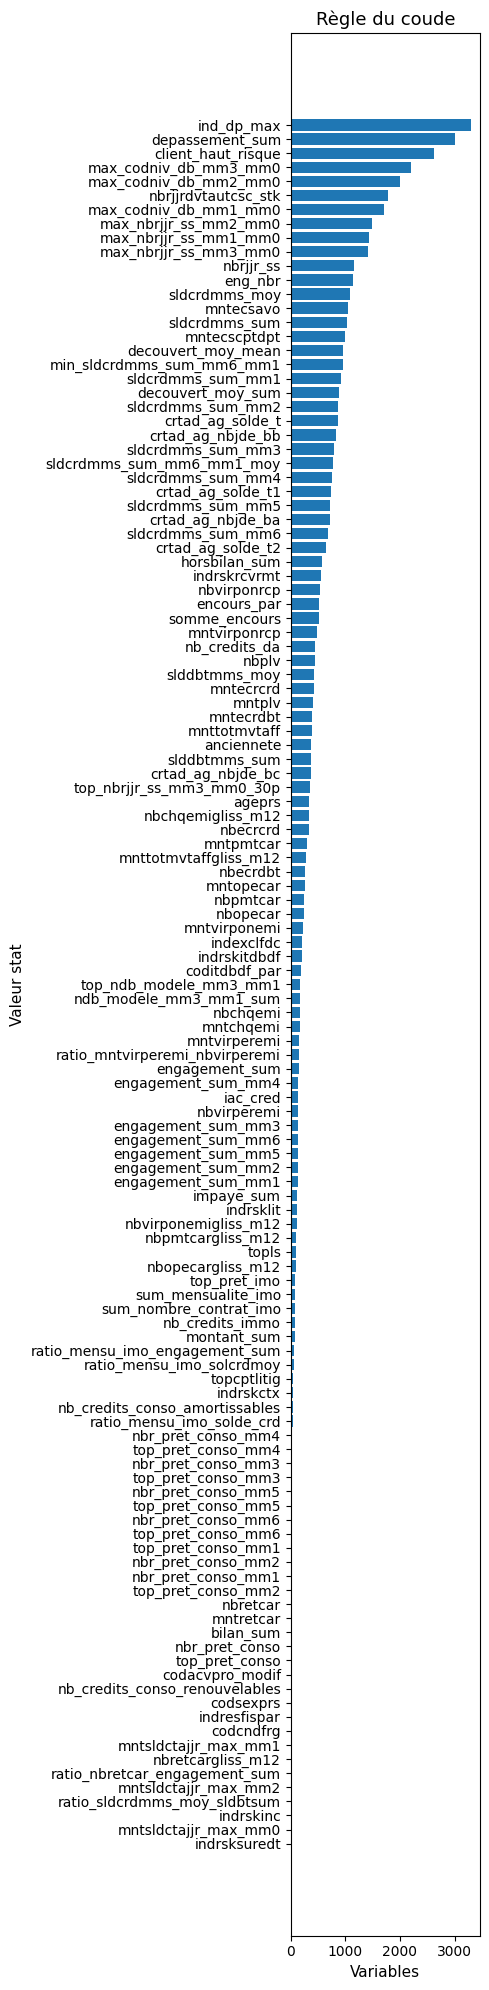

In [219]:
col_names=list(first_var_selection2[first_var_selection2["type"]=="stat_kruskal_wallis"]["var"])
valeurs_stat=list(first_var_selection2[first_var_selection2["type"]=="stat_kruskal_wallis"]["value"])
plot_regle_du_coude(col_names, valeurs_stat, titre="Règle du coude", tri=True)

In [226]:
nom_var="crtad_ag_solde_t2"
liste_triee = [x for _, x in sorted(zip(valeurs_stat, col_names), reverse=True)]
variables_pre_finales_quant=liste_triee[0:liste_triee.index(nom_var)+1]
print(f"Nombre de variables {len(variables_pre_finales_quant)} et les voici {variables_pre_finales_quant}")

Nombre de variables 31 et les voici ['ind_dp_max', 'depassement_sum', 'client_haut_risque', 'max_codniv_db_mm3_mm0', 'max_codniv_db_mm2_mm0', 'nbrjjrdvtautcsc_stk', 'max_codniv_db_mm1_mm0', 'max_nbrjjr_ss_mm2_mm0', 'max_nbrjjr_ss_mm1_mm0', 'max_nbrjjr_ss_mm3_mm0', 'nbrjjr_ss', 'eng_nbr', 'sldcrdmms_moy', 'mntecsavo', 'sldcrdmms_sum', 'mntecscptdpt', 'decouvert_moy_mean', 'min_sldcrdmms_sum_mm6_mm1', 'sldcrdmms_sum_mm1', 'decouvert_moy_sum', 'sldcrdmms_sum_mm2', 'crtad_ag_solde_t', 'crtad_ag_nbjde_bb', 'sldcrdmms_sum_mm3', 'sldcrdmms_sum_mm6_mm1_moy', 'sldcrdmms_sum_mm4', 'crtad_ag_solde_t1', 'sldcrdmms_sum_mm5', 'crtad_ag_nbjde_ba', 'sldcrdmms_sum_mm6', 'crtad_ag_solde_t2']


In [ ]:
##Etapes à venir
##Faire la discretisation
#Sélectionner les variables selon après discrétisation
#Lancer le modèle logistique
#Faire le tableau
##Calculer les performances

In [233]:
##discretisation avec les arbres
def discretize_with_tree(df, col, cible, max_depth=3):
    # Arbre de décision profondeur 2
    X=df[[col]]
    y=df[cible]
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, y)

    thresholds = tree.tree_.threshold[tree.tree_.threshold != -2]
    thresholds = np.sort(thresholds)
    return thresholds, pd.Series(np.digitize(df[col], bins=thresholds), index=df.index)

##discretisation avec les centiles
def discretize_with_centiles(data, var, cible, nb_centiles, tolerance=0.02):
    # 1. Calcul des centiles
    df=data.copy()
    centiles = np.percentile(df[var], np.linspace(0, 100, nb_centiles + 1))
    df[f'{var}_centile'] = pd.cut(df[var], bins=centiles, include_lowest=True, labels=False)

    # 2. Calcul du taux de cible pour chaque centile
    taux_cible = df.groupby(f'{var}_centile')[cible].mean()

    # 3. Regroupement des centiles contigus selon tolérance
    grouped_bins = []
    current_group = [0]

    for i in range(1, len(taux_cible)):
        if abs(taux_cible[i] - taux_cible[i-1]) <= tolerance:
            current_group.append(i)
        else:
            grouped_bins.append(current_group)
            current_group = [i]
    grouped_bins.append(current_group)

    # 4. Création de la variable discrète finale
    def map_to_group(centile):
        for i, group in enumerate(grouped_bins):
            if centile in group:
                return i
        return np.nan

    df[f'{var}_discret'] = df[f'{var}_centile'].apply(map_to_group)

    return grouped_bins, df[f'{var}_discret'], taux_cible

##discretisation avec WOE
def discretize_with_WOE(df, col, cible):
    pass

In [ ]:
df_train2=df_train.copy()
for col in variables_pre_finales:
    _, df_train2[col]=discretize_with_tree(df_train2, col, "cible")

0    42200
1     1042
Name: count, dtype: int64

In [241]:
r,d=discretize_with_tree(df_train2, "eng_nbr", "cible")
d.value_counts()

0    42877
3      282
2       78
1        5
Name: count, dtype: int64

In [242]:
df_train["eng_nbr"]

15756    0.0
31387    0.0
39810    0.0
46555    0.0
30794    0.0
        ... 
13147    0.0
12961    0.0
35382    0.0
10171    0.0
41562    0.0
Name: eng_nbr, Length: 43242, dtype: float64

In [238]:
df_train["client_haut_risque"].value_counts()

client_haut_risque
0.0    42200
1.0     1042
Name: count, dtype: int64

In [158]:
## Validation des discretisations
def verifier_contraintes(df, var_discret, cible, min_pop=0.05, min_diff_cible=0.3):
    # 1. Calcul de la proportion de population par modalité
    counts = df[var_discret].value_counts(normalize=True)
    population_ok = (counts >= min_pop).all()

    # 2. Calcul du taux de cible par modalité
    taux_cible = df.groupby(var_discret)[cible].mean()

    # Vérifier si la différence minimale entre toutes les paires de modalités est >= min_diff_cible
    taux_diff_ok = True
    modalities = taux_cible.index.tolist()

    for i in range(len(modalities)):
        for j in range(i+1, len(modalities)):
            diff = abs(taux_cible[modalities[i]] - taux_cible[modalities[j]])
            if diff < min_diff_cible:
                taux_diff_ok = False
                break
        if not taux_diff_ok:
            break

    details = {
        'proportions': counts.to_dict(),
        'taux_cible': taux_cible.to_dict()
    }

    return population_ok and taux_diff_ok, details

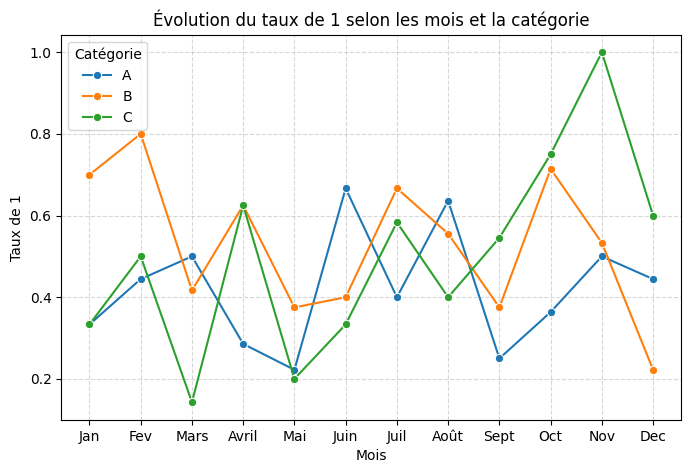

In [184]:
def analyze_stability(df, col, cible):
    taux = (
    df.groupby(['month', col])[cible]
    .mean()
    .reset_index(name='taux_1')
    )
    
    ordre_mois  = ['Jan', 'Fev', 'Mars', 'Avril', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Dec']
    taux['month'] = pd.Categorical(taux['month'], categories=ordre_mois, ordered=True)

    plt.figure(figsize=(8,5))
    sns.lineplot(
        data=taux,
        x='month',
        y='taux_1',
        hue='categorie',
        marker='o'
    )

    plt.title("Évolution du taux de 1 selon les mois et la catégorie")
    plt.ylabel("Taux de 1")
    plt.xlabel("Mois")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Catégorie')
    plt.show()

np.random.seed(42)
mois_liste = ['Jan', 'Fev', 'Mars', 'Avril', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Dec']
categories = ['A', 'B', 'C']

# On génère 300 lignes (12 mois x 3 catégories x ~8 observations)
df = pd.DataFrame({
    'month': np.random.choice(mois_liste, size=300, replace=True),
    'categorie': np.random.choice(categories, size=300, replace=True),
    'target': np.random.binomial(1, 0.5, size=300)  # valeurs 0 ou 1
})
analyze_stability(df, 'categorie', 'target')

In [178]:
def analyze_stability_by_month(df, variable, cible):

    # 2. Calcul des effectifs mensuels par modalité
    monthly_volumes = df.groupby([variable, 'month']).size().reset_index(name='monthly_count')

    # 3. Calcul des taux de l'événement (cible = 1 et cible = 0) par modalité et par mois
    monthly_rates = df.groupby([variable, 'month']).agg(
        event_count=(cible, 'sum'),
        total_count=(variable, 'size')
    ).reset_index()

    # 4. Calcul des taux d'événement
    monthly_rates['event_rate'] = monthly_rates['event_count'] / monthly_rates['total_count']

    # 5. Calcul du pourcentage d'effectifs par modalité pour chaque mois
    total_monthly_count = df.groupby('month').size().reset_index(name='total_count_month')
    monthly_volumes = pd.merge(monthly_volumes, total_monthly_count, on='month', how='left')
    monthly_volumes['percentage'] = monthly_volumes['monthly_count'] / monthly_volumes['total_count_month'] * 100

    # 6. Fusionner les deux DataFrames (effectifs et taux) pour chaque modalité et mois
    merged = pd.merge(monthly_volumes, monthly_rates[['col', 'month', 'event_rate']], on=['col', 'month'], how='left')


    # 8. Graphiques pour visualiser la stabilité
    plt.figure(figsize=(12, 8))
    
    # Tracer les pourcentages des effectifs par modalité
    plt.subplot(2, 1, 1)
    for modality in df[variable].unique():
        modality_data = merged[merged[variable] == modality]
        plt.plot(modality_data['month'].astype(str), modality_data['percentage'], label=f'Modalité {modality}')
    plt.title("Pourcentage des effectifs mensuels par modalité")
    plt.xlabel("Mois")
    plt.ylabel("Pourcentage d'effectifs (%)")
    plt.xticks(rotation=45)
    plt.legend()

    # Tracer les taux d'événement (cible = 1) et de non-événement (cible = 0) par modalité
    plt.subplot(2, 1, 2)
    for modality in df[variable].unique():
        modality_data = merged[merged[variable] == modality]
        plt.plot(modality_data['month'].astype(str), modality_data['event_rate'], label=f'Taux d\'événement (1) - Modalité {modality}')
    plt.title("Taux d'événements et de non-événements mensuel par modalité")
    plt.xlabel("Mois")
    plt.ylabel("Taux (%)")
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

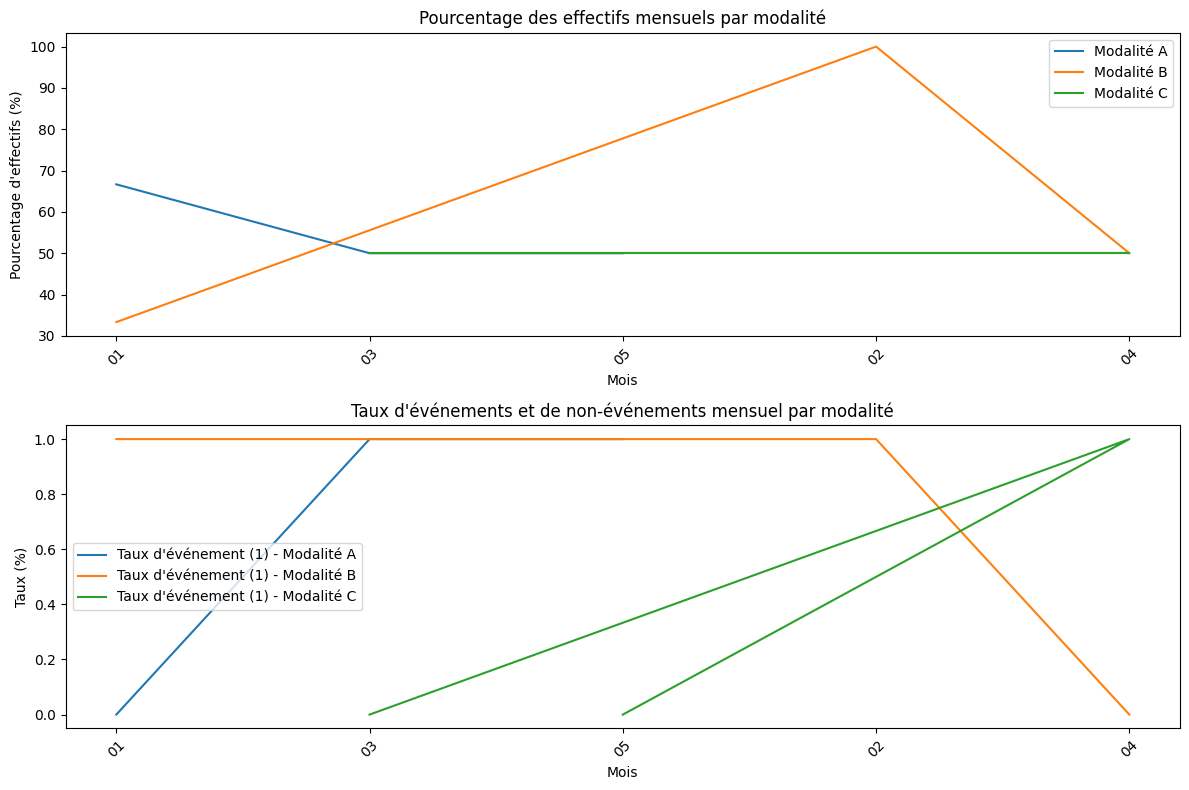

In [180]:
# Exemple d'utilisation de la fonction
dataA = {
    'col': ['A', 'B', 'A', 'B', 'C', 'A', 'C', 'B', 'A', 'C'],
    'cible': [0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    'month': ['01', '01', '01', '02', '03', '03', '04', '04', '05', '05']
}

df = pd.DataFrame(dataA)

# Appliquer la fonction pour analyser la stabilité des modalités
analyze_stability_by_month(df, 'col', 'cible')

In [ ]:
##Variables pre-finales

In [ ]:
def ordonner_matrice_par_premiere_colonne(matrice_corr):
    # Nom de la première colonne
    col0 = matrice_corr.columns[0]

    # Obtenir l'ordre décroissant selon la première colonne
    ordre = matrice_corr[col0].sort_values(ascending=False).index

    # Réordonner les lignes et colonnes selon cet ordre
    matrice_reordonnee = matrice_corr.loc[ordre, ordre]

    return matrice_reordonnee 

def matrice_cramers_v(data, variables, seuil=5):
    result = pd.DataFrame(index=variables, columns=variables, dtype=float)
    validite = pd.DataFrame(index=variables, columns=variables, dtype=bool)
    for var1 in variables:
        for var2 in variables:
            if var1 == var2:
                result.loc[var1, var2] = 1.0
            else:
                v, _ = cramers_v(data, var1, var2, seuil=seuil)
                result.loc[var1, var2] = v         
    return ordonner_matrice_par_premiere_colonne(result)

In [ ]:
matrice_cramers=matrice_cramers_v(df_train, variables_pre_finales)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
import statsmodels.api as sm

def forward_selection_logit(df, target, cramers_matrix, threshold=0.6):
    variables = [col for col in cramers_matrix.columns if col != target]
    selected_vars = []
    metrics_history = []
    y = df[target]

    for var in variables:
        # Si ce n’est pas la première variable, vérifier la corrélation
        if selected_vars:
            too_correlated = False
            for sel_var in selected_vars:
                if cramers_matrix.loc[var, sel_var] > threshold:
                    too_correlated = True
                    print(f"Variable '{var}' trop corrélée avec '{sel_var}', sautée.")
                    break
            if too_correlated:
                continue

        # Ajouter la variable (première ou non)
        selected_vars.append(var)
        X = df[selected_vars]
        X = sm.add_constant(X)

        # Ajuster le modèle logistique
        model = sm.Logit(y, X).fit(disp=0)
        y_pred_prob = model.predict(X)
        y_pred = (y_pred_prob >= 0.5).astype(int)

        # Calculer les métriques sur le train
        accuracy = accuracy_score(y, y_pred)
        auc = roc_auc_score(y, y_pred_prob)

        metrics_history.append({
            'var': selected_vars.copy(),
            'accur': accuracy,
            'auc': auc
        })

        print(f"Variables: {selected_vars}, Accuracy: {accuracy:.3f}, AUC: {auc:.3f}")
    return metrics_history


In [ ]:
##Sélection de variables finales
final_variables=forward_selection_logit(df_train, "cible", cramers_matrix, threshold=0.6)
plot_regle_du_coude(final_variables.var, final_variables.accur, titre="Règle du coude", tri=True)
plot_regle_du_coude(final_variables.var, final_variables.auc, titre="Règle du coude", tri=True)

In [ ]:
##Variables finales


In [162]:
#data["datdelhis_mm0"]
data


{'var_quanti': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
 'cible': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1]}